In [3]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np


In [4]:
tokenizer = Tokenizer()
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus=data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
word_index=tokenizer.word_index
vocab_size=len(word_index)+1
sequence=[]

In [5]:
for line in corpus:
    seq = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(seq)):
        sequence.append(seq[:i+1])


max_len=max(len(x) for x in sequence )
input_sequence=np.array(pad_sequences(sequence,maxlen=max_len))


In [12]:
xs ,labels=input_sequence[:,:-1],input_sequence[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)


In [20]:
model=tf.keras.Sequential()
model.add(Embedding(vocab_size,64,input_length=max_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(vocab_size,activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')
history=model.fit(xs,ys,epochs=500,verbose=1)

Epoch 1/500
15/15 [==============================] - 0s 3ms/step - loss: 5.5702 - acc: 0.0044
Epoch 2/500
15/15 [==============================] - 0s 3ms/step - loss: 5.5466 - acc: 0.0486
Epoch 3/500
15/15 [==============================] - 0s 3ms/step - loss: 5.4963 - acc: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 3ms/step - loss: 5.3392 - acc: 0.0486
Epoch 5/500
15/15 [==============================] - 0s 3ms/step - loss: 5.1481 - acc: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 5.0774 - acc: 0.0419
Epoch 7/500
15/15 [==============================] - 0s 3ms/step - loss: 5.0413 - acc: 0.0464
Epoch 8/500
15/15 [==============================] - 0s 3ms/step - loss: 5.0124 - acc: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 3ms/step - loss: 4.9786 - acc: 0.0530
Epoch 10/500
15/15 [==============================] - 0s 3ms/step - loss: 4.9435 - acc: 0.0508
Epoch 11/500
15/15 [==============================] - 0s 3m

15/15 [==============================] - 0s 3ms/step - loss: 2.2210 - acc: 0.5740
Epoch 88/500
15/15 [==============================] - 0s 3ms/step - loss: 2.2017 - acc: 0.5740
Epoch 89/500
15/15 [==============================] - 0s 3ms/step - loss: 2.1740 - acc: 0.5894
Epoch 90/500
15/15 [==============================] - 0s 3ms/step - loss: 2.1468 - acc: 0.5872
Epoch 91/500
15/15 [==============================] - 0s 3ms/step - loss: 2.1223 - acc: 0.6071
Epoch 92/500
15/15 [==============================] - 0s 3ms/step - loss: 2.1008 - acc: 0.6093
Epoch 93/500
15/15 [==============================] - 0s 3ms/step - loss: 2.0785 - acc: 0.6115
Epoch 94/500
15/15 [==============================] - 0s 3ms/step - loss: 2.0546 - acc: 0.6203
Epoch 95/500
15/15 [==============================] - 0s 3ms/step - loss: 2.0325 - acc: 0.6181
Epoch 96/500
15/15 [==============================] - 0s 3ms/step - loss: 2.0161 - acc: 0.6159
Epoch 97/500
15/15 [==============================] - 0s 3ms/st

15/15 [==============================] - 0s 3ms/step - loss: 0.9118 - acc: 0.8896
Epoch 173/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9085 - acc: 0.8985
Epoch 174/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9080 - acc: 0.8808
Epoch 175/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8956 - acc: 0.8962
Epoch 176/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8868 - acc: 0.8918
Epoch 177/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9242 - acc: 0.8742
Epoch 178/500
15/15 [==============================] - 0s 3ms/step - loss: 0.9132 - acc: 0.8786
Epoch 179/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8898 - acc: 0.8808
Epoch 180/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8689 - acc: 0.8962
Epoch 181/500
15/15 [==============================] - 0s 3ms/step - loss: 0.8564 - acc: 0.8896
Epoch 182/500
15/15 [==============================] -

15/15 [==============================] - 0s 3ms/step - loss: 0.5016 - acc: 0.9161
Epoch 258/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5346 - acc: 0.9073
Epoch 259/500
15/15 [==============================] - 0s 3ms/step - loss: 0.5673 - acc: 0.8896
Epoch 260/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4951 - acc: 0.9227
Epoch 261/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4606 - acc: 0.9316
Epoch 262/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4421 - acc: 0.9360
Epoch 263/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4325 - acc: 0.9382
Epoch 264/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4188 - acc: 0.9404
Epoch 265/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4126 - acc: 0.9382
Epoch 266/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3997 - acc: 0.9448
Epoch 267/500
15/15 [==============================] -

15/15 [==============================] - 0s 3ms/step - loss: 0.2333 - acc: 0.9492
Epoch 343/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2317 - acc: 0.9514
Epoch 344/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2342 - acc: 0.9492
Epoch 345/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2328 - acc: 0.9514
Epoch 346/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2276 - acc: 0.9514
Epoch 347/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2275 - acc: 0.9536
Epoch 348/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2247 - acc: 0.9470
Epoch 349/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2238 - acc: 0.9514
Epoch 350/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2225 - acc: 0.9426
Epoch 351/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2210 - acc: 0.9492
Epoch 352/500
15/15 [==============================] -

15/15 [==============================] - 0s 3ms/step - loss: 0.1611 - acc: 0.9470
Epoch 428/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1605 - acc: 0.9470
Epoch 429/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1616 - acc: 0.9492
Epoch 430/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1605 - acc: 0.9492
Epoch 431/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1592 - acc: 0.9492
Epoch 432/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1589 - acc: 0.9492
Epoch 433/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1581 - acc: 0.9514
Epoch 434/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1577 - acc: 0.9470
Epoch 435/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1585 - acc: 0.9426
Epoch 436/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1572 - acc: 0.9492
Epoch 437/500
15/15 [==============================] -

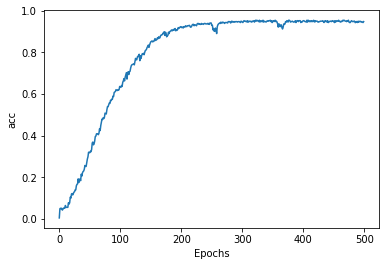

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'acc')

In [22]:
dict={}
dict.items()

seed='Battered is hadnt'
num_pred=20
for i in range(num_pred):
    token_list=tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_len - 1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed += " " + output_word
print(seed)

Battered is hadnt a grand party for friends and relations relations relations relations relations relations relations think a strangled ask swore glisten ten
